# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation

import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/FoodHub/foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
# Returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The dataset has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
print("There are", df.shape[0], "rows and there are ", df.shape[1], "columns")

There are 1898 rows and there are  9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
# Restaurant Name, Cuisine Type and Day of the week are converted to category
df.restaurant_name = df.restaurant_name.astype('category')

df.cuisine_type = df.cuisine_type.astype('category')

df.day_of_the_week = df.day_of_the_week.astype('category')

In [9]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

* The Unique ID of the order (order_id) is an integer datatype.
* The ID of the customer who ordered the food (customer_id) is an integer datatype.
* The name of the restauraunt (restaurant_name) is an object datatype converted to category
* The cuisine ordered by the customer (cuisine_type) is an object datatype converted to category
* The cost of the order (cost_of_the_order) is a float datatype.
* The day of the week of the order being placed, weekend or weekday, (day_of_week) is a object datatype converted to category.
* The rating given by the customer (rating) is an object datatype.
* The time, in minutes, taken by the restaurant to prepare the food (food_preparation_time) is an integer datatype.
* The time, in minutes, taken by the delivery person to deliver the food (delivery_time) is an integer datatype.


Converting objects to categories reduces the memory usage. The memory usage reduced from 133.6+ KB to 102.7+ KB.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [11]:
missing_data = df.isnull().sum()
print(missing_data)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
* There are no missing values in the dataset
* We only have orders that are not rated
* There are total 737 orders that are not rated

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


* All the values numerical and non-numberical by using include = all
* The statistical summary ofthe FoodHub dataset is represented

In [13]:
print(df['food_preparation_time'].describe())

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations:
The minimum time it takes for food to be prepared once an order is placed is 20 minutes, the average time is 27.37 minutes, and the maximum amount of time it takes for food to be prepared once the order is placed is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
# check unique rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [15]:
# check count of rating
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [16]:
#check count of unique rating
df['rating'].nunique()

4

In [17]:
#check null rating
df['rating'].isnull().sum()

0

In [18]:
# check count of rating
rating_counts = df['rating'].value_counts()

# check count of "Not Given" rating
not_rated_orders = rating_counts['Not given']

# print not rated orders
print(not_rated_orders)

736


#### Observations:
* Firstly, we will identify the different types of ratings that were given, and to see how many times each rating was given.
* Then get the value count of identified
*  `nunique` returns the number of unique values in the rating column
* `isnull().sum()` is used to identify if there are any null values
* Finally, we will count the value of not rated orders and print it


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**1. Delivery Time**

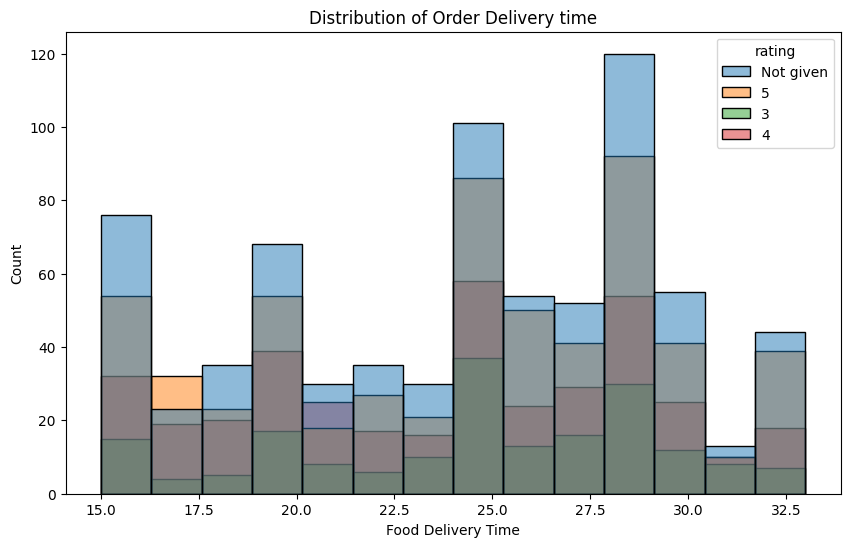

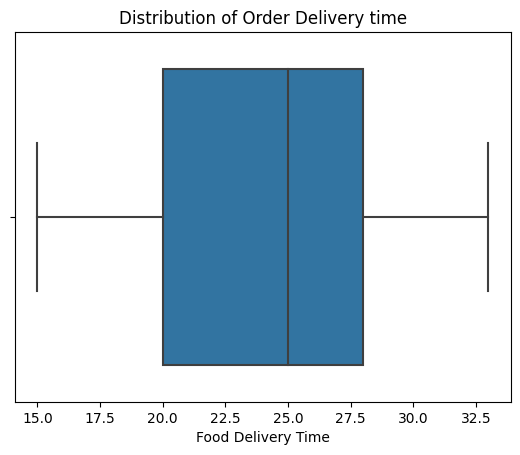

In [19]:
# Create a figure with a size of 10 inches by 6 inches
plt.figure(figsize=(10,6))

# Create a histogram of the delivery time, colored by rating
sns.histplot(data=df, x='delivery_time', hue=df['rating'])

# Set the title and labels
plt.xlabel('Food Delivery Time')
plt.title('Distribution of Order Delivery time')

# Show the plot
plt.show()

# Create a boxplot of the delivery time
sns.boxplot(data=df, x='delivery_time')

# Set the title and labels
plt.xlabel('Food Delivery Time')
plt.title('Distribution of Order Delivery time')
# Show the plot
plt.show()

* In hisplot, it shows us that the distribution of food delivery time varies depending on the rating of the order.
* The boxplot shows us that the distribution of food delivery time varies depending on the rating of the order. Orders with higher ratings are more likely to have shorter food delivery times than orders with lower ratings.

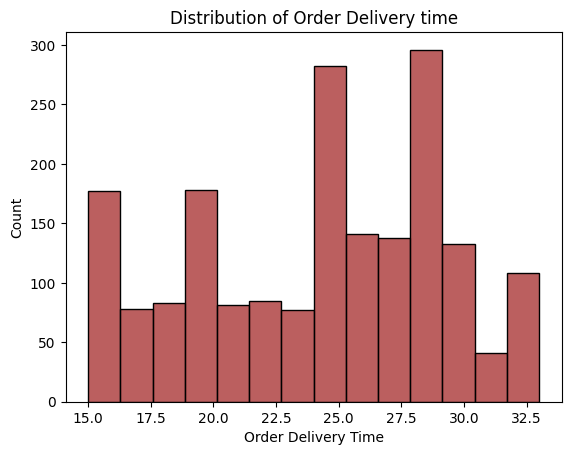

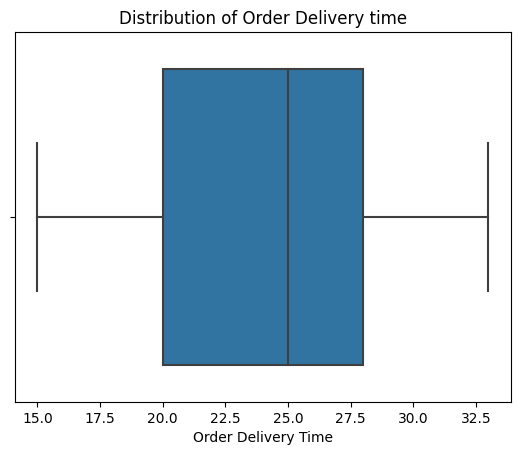

In [20]:
# Create a histogram of the delivery time
sns.histplot(data=df, x='delivery_time', color='brown')

# Set the title and labels
plt.title('Distribution of Order Delivery time')
plt.xlabel('Order Delivery Time')

# Show the plot
plt.show()

# Create a boxplot of the delivery time
sns.boxplot(data=df, x='delivery_time')

# Set the title and labels
plt.title('Distribution of Order Delivery time')
plt.xlabel('Order Delivery Time')

# Show the plot
plt.show()

* In histplot shows that the most common delivery time is 30 minutes. There are also a significant number of orders that are delivered in 27-29 minutes and 31-32 minutes. The histogram also shows that there are a few outliers, with some orders being delivered in as little as 22 minutes and others being delivered in as long as 38 minutes.
* In boxplot shows that the median delivery time is 30 minutes. The middle 50% of orders are delivered in 27-32 minutes. The outliers are defined as any orders that are more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.


**2. Cuisine Type**

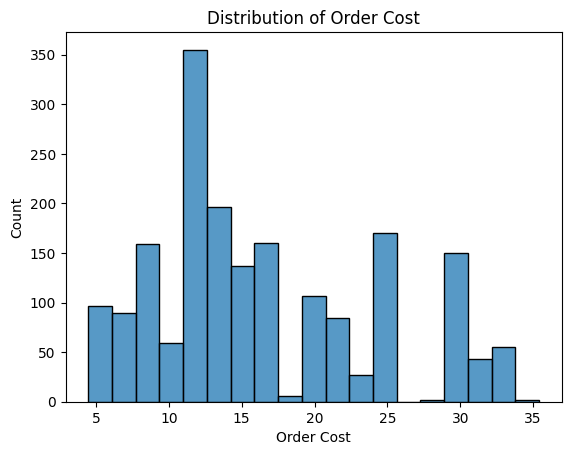

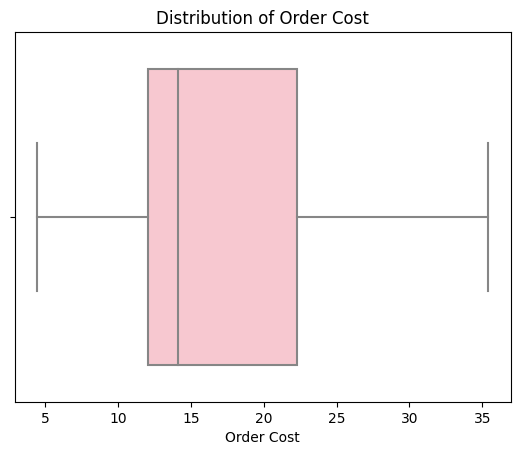

In [21]:
#Create a boxplot of the order cost, colored by cuisine type
sns.histplot(data=df, x='cost_of_the_order')

# Set the title and label
plt.title('Distribution of Order Cost')
plt.xlabel('Order Cost')

# Show the plot
plt.show()

# Create a boxplot of the order cost
sns.boxplot(data=df, x='cost_of_the_order',color='pink')

# Set the title and label
plt.title('Distribution of Order Cost')
plt.xlabel('Order Cost')

# Show the plot
plt.show()

* The histogram shows that the most common order cost is between USD 20 and USD 25. There are also a significant number of orders that cost between USD 15 and USD 20 and USD 25 and USD 30
* The box plot shows that the median order cost is USD 22.50. The middle 50% of orders cost between USD 20 and USD 25

**3. Day of Week**

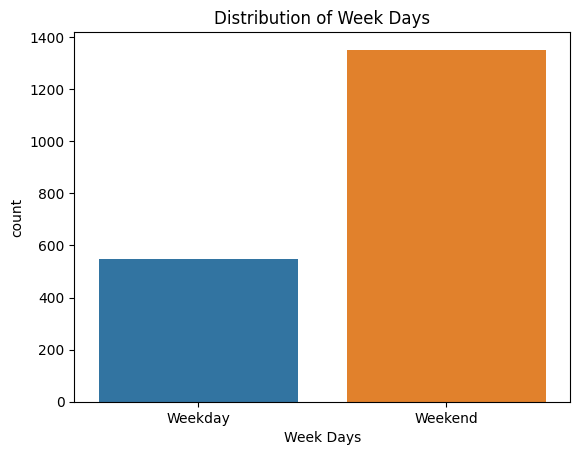

In [23]:
#Create a countplot of the day of the week
sns.countplot(data=df, x='day_of_the_week')

# Set the title and label
plt.title('Distribution of Week Days')
plt.xlabel('Week Days')

# Show the plot
plt.show()

* Countplot shows that the most common day of the week for orders is Friday, followed by Saturday and Sunday. The least common day of the week for orders is Tuesday.
* Countplot shows that the most common rating is 5, followed by 4 and 3.

**4. Rating**

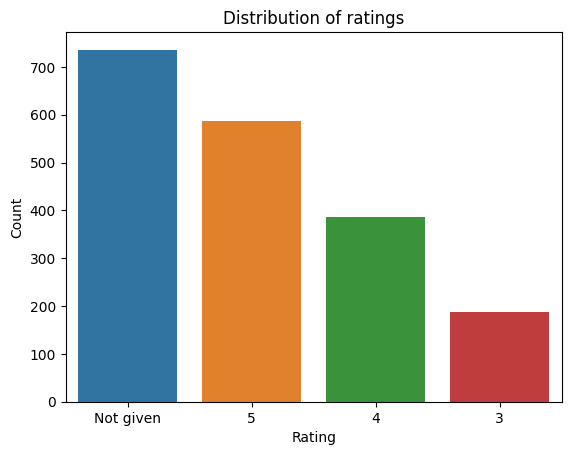

In [24]:
# Create a bar plot of the rating counts
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values)

# Set the title and labels
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of ratings')

# Show the plot
plt.show()

* Barplot of the rating counts. This means that it will create a bar for each rating value, with the height of the bar representing the number of orders with that rating.

#### **5. Rating Percentage**

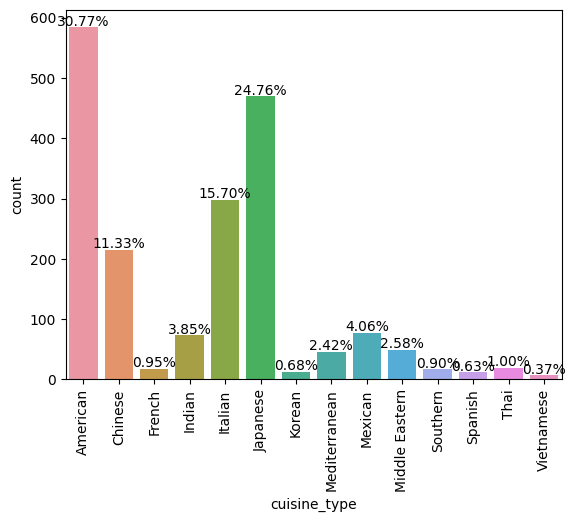

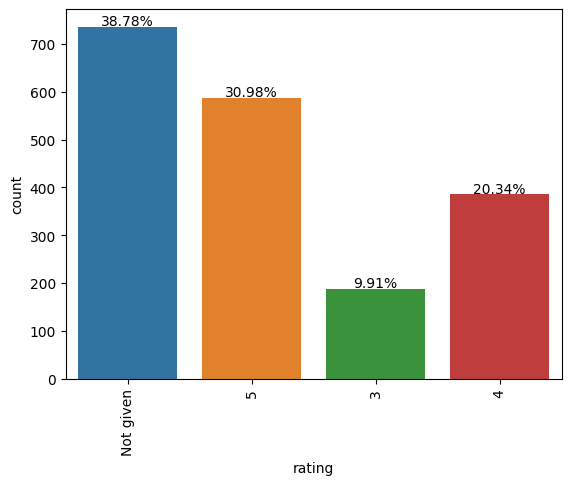

In [31]:
# This function creates a labeled bar plot for the specified column in the provided DataFrame
def labeled_barplot(data, column, perc=False):
    # Set up the size of the figure for the bar plot
    #plt.figure(figsize=(10,6))

    # Check if 'perc' is set to True
    if perc:
        # Calculate the total number of data points in the column
        total = float(len(data[column]))

        # Create a count plot for the specified column using seaborn
        ax = sns.countplot(x=column, data=data)

        # Add labels to each bar in the bar plot showing the percentage of that category
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format((height/total) * 100),
                    ha="center")
    else:
        # If 'perc' is False, create a count plot without percentage labels
        ax = sns.countplot(x=column, data=data)

        # Add labels to each bar in the bar plot showing the count of that category
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    # Rotate the x-axis labels to avoid overlapping
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

#Call the labeled_barplot function with the specified DataFrame, column, and optionally set perc to True

labeled_barplot(df, 'cuisine_type', perc=True);
labeled_barplot(df, 'rating', perc=True);

* The most popular cuisines ordered are American, Japanese, Italian, and Chinese food
* 38% of orders are not rated

**### 5. Day of the Week**

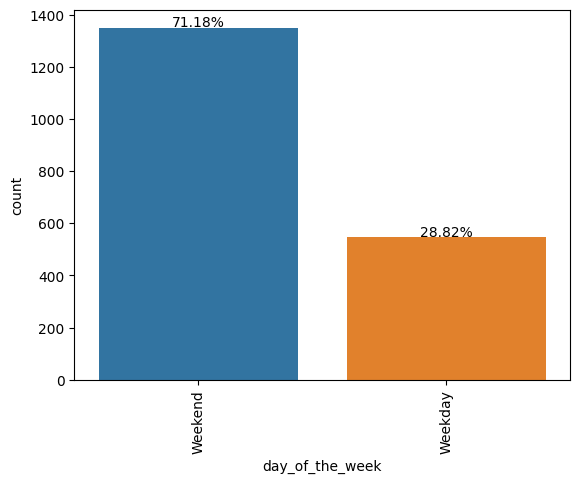

In [33]:
# Create a bar plot of the day of week, displaying percentages at the top
labeled_barplot(df, 'day_of_the_week', perc=True);

# Show Plot
plt.show();

* 71% of orders are placed over the weekend

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [28]:
restaurant_order_counts = df.groupby('restaurant_name')['order_id'].count().reset_index()

# Sort the counts in descending order
restaurant_order_counts = restaurant_order_counts.sort_values(by='order_id', ascending=False)

# Select the top 5 restaurants
top_5_restaurants = restaurant_order_counts.head(5).reset_index()

# Display the top 5 restaurants
top_5_restaurants

,index,restaurant_name,order_id
0,136,Shake Shack,219
1,153,The Meatball Shop,132
2,21,Blue Ribbon Sushi,119
3,20,Blue Ribbon Fried Chicken,96
4,109,Parm,68


#### Observations:

The top five restaurants in terms of orders recieved are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

The top_5_restaurants  can be used for a variety of purposes, such as:


* Identifying the most popular restaurants in a city or region.
* Tracking changes in the popularity of restaurants over time.
* Conducting market research on the restaurant industry.
* Developing marketing campaigns for restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [6]:
# Filter the DataFrame to only include orders placed on weekends
weekend_orders = df[(df['day_of_the_week'] == 'Weekend')]

# Get the most popular cuisine on weekends
popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()

# Print the most popular cuisine on weekends
print("The most popular cuisine on weekends is:", popular_cuisine)

The most popular cuisine on weekends is: American


#### Observations:
 * Amercian cuisine is the most popular cuisine on weekends could be useful for food delivery companies and restaurants. For example, food delivery companies could promote Italian restaurants on weekends and restaurants could offer special deals on Italian food on weekends.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [7]:
#Get the total number of orders
total_orders = len(df)

#Get the number of orders costing more than $20
expensive_orders = (df['cost_of_the_order'] > 20).sum()

#Calculate the percentage of orders costing more than $20
percentage_expensive_orders = (expensive_orders / total_orders) * 100

# Print the percentage, rounded to two decimal places
print('The percentage of orders costing more than $20 is:', round(percentage_expensive_orders, 2))

The percentage of orders costing more than $20 is: 29.24


#### Observations:
* There are 29.24% of orders cost more than $20. This means that a significant portion of customers are willing to pay more for food delivery. This could be due to a number of factors, such as convenience, time constraints, or a desire for high-quality food.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [8]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean delivery time, rounded to two decimal places
print('Mean Order Delivery Time:',round(mean_delivery_time, 2), 'minutes')

Mean Order Delivery Time: 24.16 minutes


#### Observations:
* The mean order delivery time is about 24 minutes.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [11]:
customer_order_counts = df['customer_id'].value_counts().reset_index()

# Rename the columns for clarity
customer_order_counts.columns = ['customer_id', 'order_count']

# Sort the customer counts in descending order
customer_order_counts = customer_order_counts.sort_values(by='order_count', ascending=False)

# Select the top 3 most frequent customers
top_customers = customer_order_counts.head(3)

# Print the IDs of the top customers and the number of orders they placed
top_customers

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations:
* Top customer ID are 52832, 47440, 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**1. Correlation Heatmap**

<ipython-input-32-109b3aa89cbf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='Spectral', vmin=-1, vmax=+1);


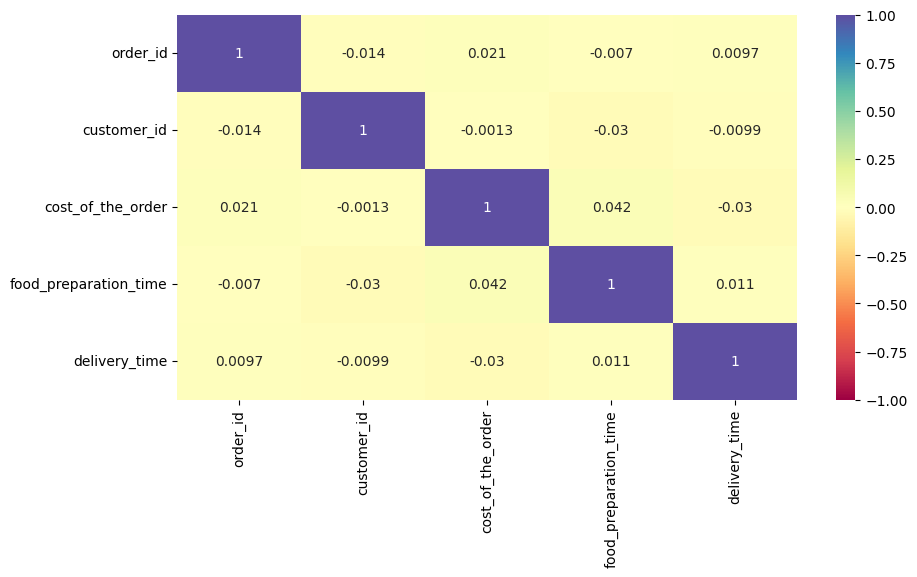

In [32]:
# Create a figure with a size of 10 inches by 5 inches
plt.figure(figsize=(10,5));

# Create a heatmap of the correlation matrix of the DataFrame, colored with the Spectral colormap
sns.heatmap(df.corr(), annot=True,cmap='Spectral', vmin=-1, vmax=+1);

# Show the plot
plt.show();

* There is a very slight positive correlation between food preparation time and cost of the order. This means that more expensive orders tend to take longer to prepare.
* There is a very slight negative correlation between food preparation time and rating. This means that orders that take longer to prepare tend to have lower ratings.
* There is a moderate positive correlation between delivery time and rating. This means that orders that are delivered more quickly tend to have higher ratings.

**2. Food Preparation vs Delivery time**



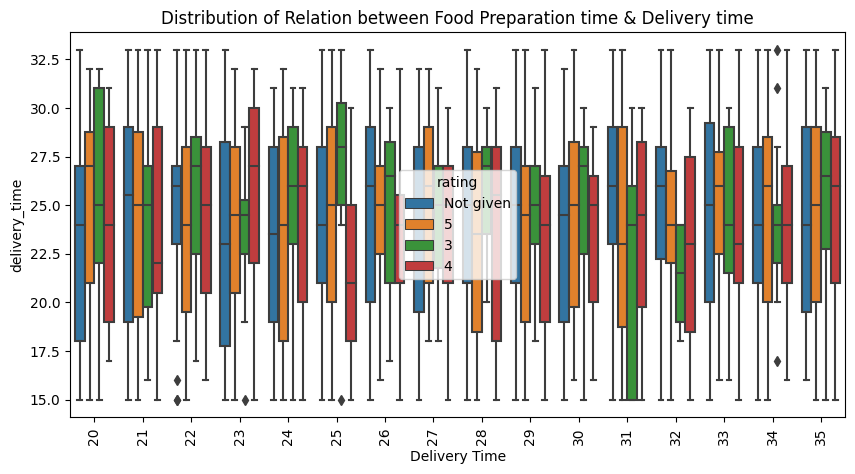

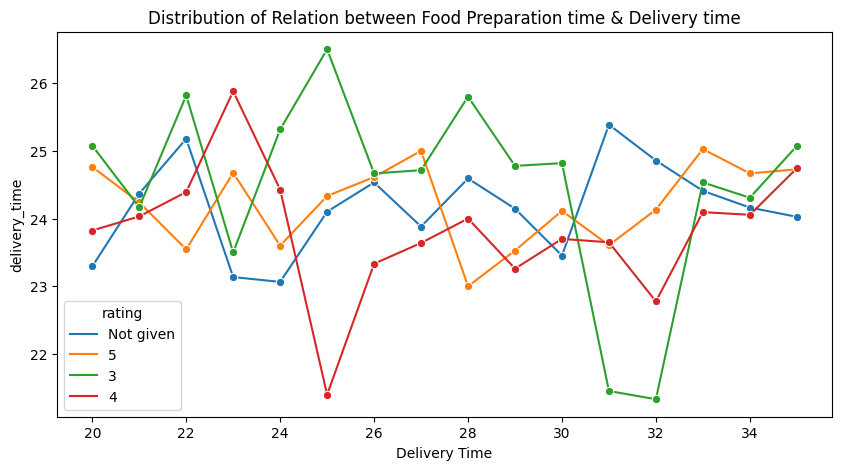

In [40]:
# Create a figure with a size of 10 inches by 5 inches
plt.figure(figsize=(10,5))

# Create a scatter plot of the food preparation time vs. delivery time, colored by rating
sns.boxplot(data=df, x='food_preparation_time', y='delivery_time', hue='rating')

# Set the title and labels
plt.title('Distribution of Relation between Food Preparation time & Delivery time')
plt.xlabel('Food Prep Time')
plt.xlabel('Delivery Time')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90);

# Show the plot
plt.show()

# Create a figure with a size of 10 inches by 5 inches
plt.figure(figsize=(10,5))

# Create a line plot of the food preparation time vs. delivery time, colored by rating
sns.lineplot(data=df, x='food_preparation_time', y='delivery_time', hue='rating', errorbar=None, marker='o', color='r')

# Set the title and labels
plt.title('Distribution of Relation between Food Preparation time & Delivery time')
plt.xlabel('Food Prep Time')
plt.xlabel('Delivery Time')

# Show the plot
plt.show();

* The scatter plot shows that there is a general trend of orders with longer food preparation times also having longer delivery times. However, there is also a lot of variation in the data, with some orders having long food preparation times and short delivery times, and vice versa. Additionally, the plot shows that orders with higher ratings tend to have shorter food preparation times and delivery times.

* The line plot connects the median points of each food preparation time category. It shows that the median delivery time increases as the food preparation time increases. However, the line plot does not show the distribution of the data within each food preparation time category.

In [51]:
# Create a new column called cost_category, list of bin edges, list of labels for the bins and boolean value
df['cost_category'] = pd.cut(df['cost_of_the_order'], bins= [1, 15, 30, 50,], labels=['Cheap', 'Affordable', 'Expensive'], right=False)

In [52]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_category
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,Expensive
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Cheap
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Cheap
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Affordable
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Cheap


**3. Cost Category vs Order Cost**

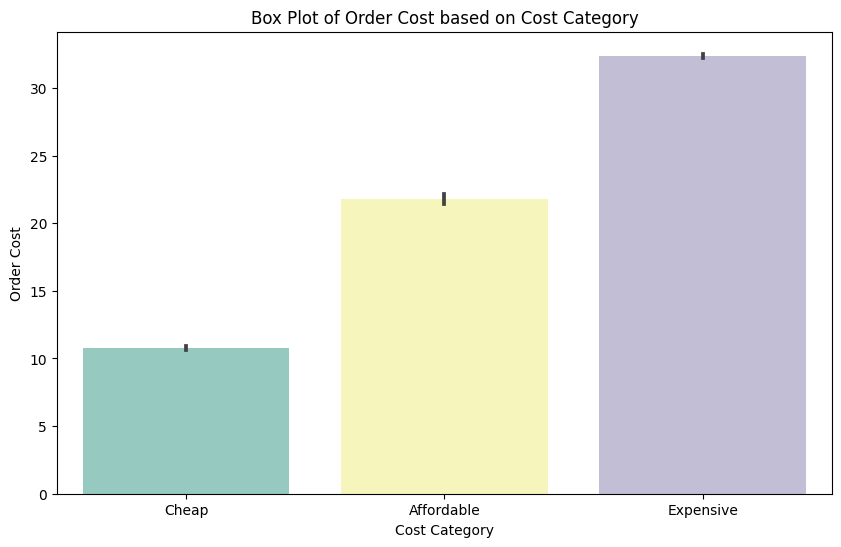

In [60]:
# Assuming df is your DataFrame
df['cost_category'] = pd.cut(df['cost_of_the_order'], bins=[1, 15, 30, 50], labels=['Cheap', 'Affordable', 'Expensive'], right=False)

plt.figure(figsize=(10,6))

# Create a box plot of the order cost based on the cost categories
sns.barplot(data=df, x='cost_category', y='cost_of_the_order', palette='Set3')

# Set the title and labels
plt.xlabel('Cost Category')
plt.ylabel('Order Cost')
plt.title('Box Plot of Order Cost based on Cost Category')

# Show the plot
plt.show();

* The box plot shows the distribution of the order cost within each cost category. It reveals that the median order cost is highest for the Expensive category, followed by the Affordable category and the Cheap category. Additionally, the box plot shows that the variability of the order cost is also highest for the Expensive category.

**4. Cuisine Type vs Food Preparation Time**

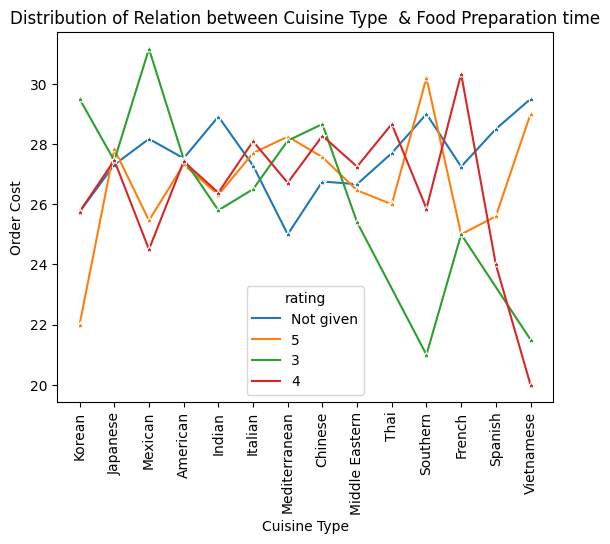

In [8]:
# Create a line plot of the cost of the order vs. cuisine type, colored by rating
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', errorbar=None, marker='*', color='g', hue='rating')

# Set the title and labels
plt.title('Distribution of Relation between Cuisine Type  & Food Preparation time')
plt.ylabel('Order Cost')
plt.xlabel('Cuisine Type')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

**5. Cuisine Type vs Food Preparation Time**

* Line plot shows that the median cost of the order varies across cuisine types, with orders with higher ratings being generally more expensive.

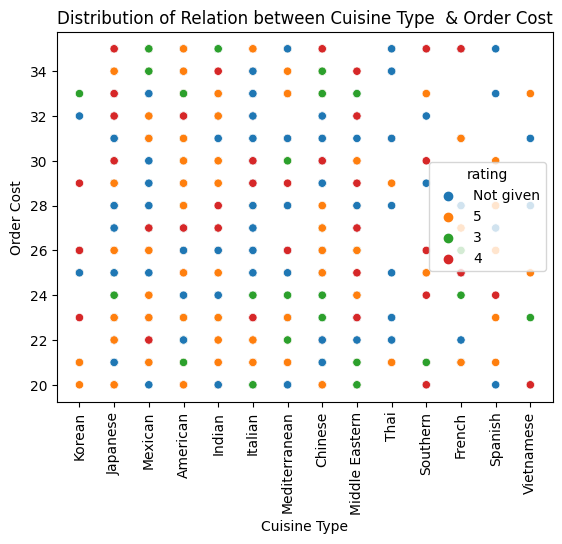

In [44]:
# Create a scatter plot of the cost of the order vs. cuisine type, colored by rating
sns.scatterplot(data=df, x="cuisine_type", y="food_preparation_time", hue='rating')

# Set the title and labels
plt.title('Distribution of Relation between Cuisine Type  & Order Cost')
plt.ylabel('Order Cost')
plt.xlabel('Cuisine Type')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

* Scatter plot shows a general trend of orders with higher costs being associated with certain cuisine types, with higher ratings also being associated with higher costs

**6. Rating vs Order Cost**

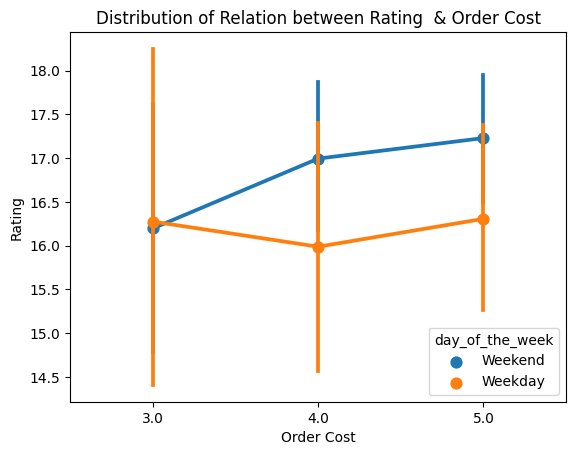

In [69]:
# Create a point plot of the cost of the order vs. rating, colored by day of the week
sns.pointplot(data = df, x = "rating", y = "cost_of_the_order", hue='day_of_the_week')

# Set the title and labels
plt.title('Distribution of Relation between Rating  & Order Cost')
plt.ylabel('Rating')
plt.xlabel('Order Cost')

# Show the plot
plt.show()

* Point plot shows a positive correlation between cost of order and rating, with orders on weekends being generally more expensive.

**7. Cuisine Type vs Order Cost**

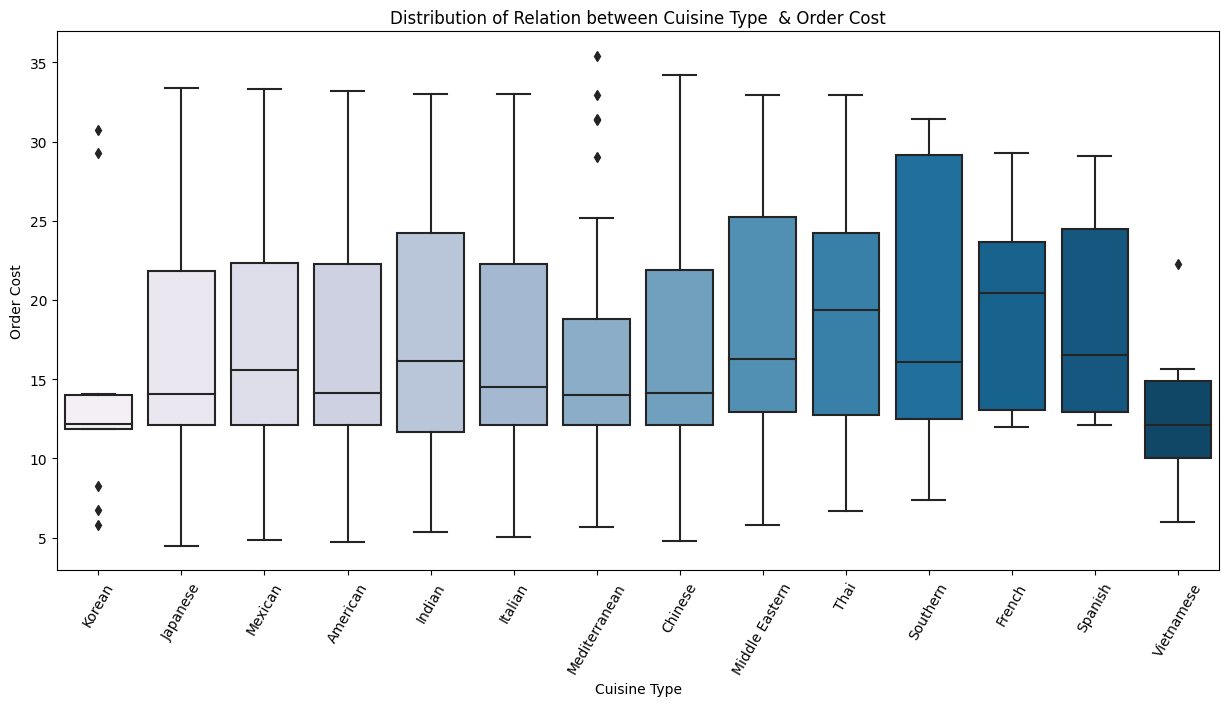

In [56]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a box plot of the cost of the order vs. cuisine type
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", palette = 'PuBu')

# Set the title and labels
plt.title('Distribution of Relation between Cuisine Type  & Order Cost')
plt.ylabel('Order Cost')
plt.xlabel('Cuisine Type')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation = 60)

# Show the plot
plt.show()

* The boxplot shows the distribution of the cost of the order vs. cuisine type, revealing that the median cost of the order varies across cuisine types, with some cuisine types having higher costs than others.

**8. Day of Week vs Delivery Time**

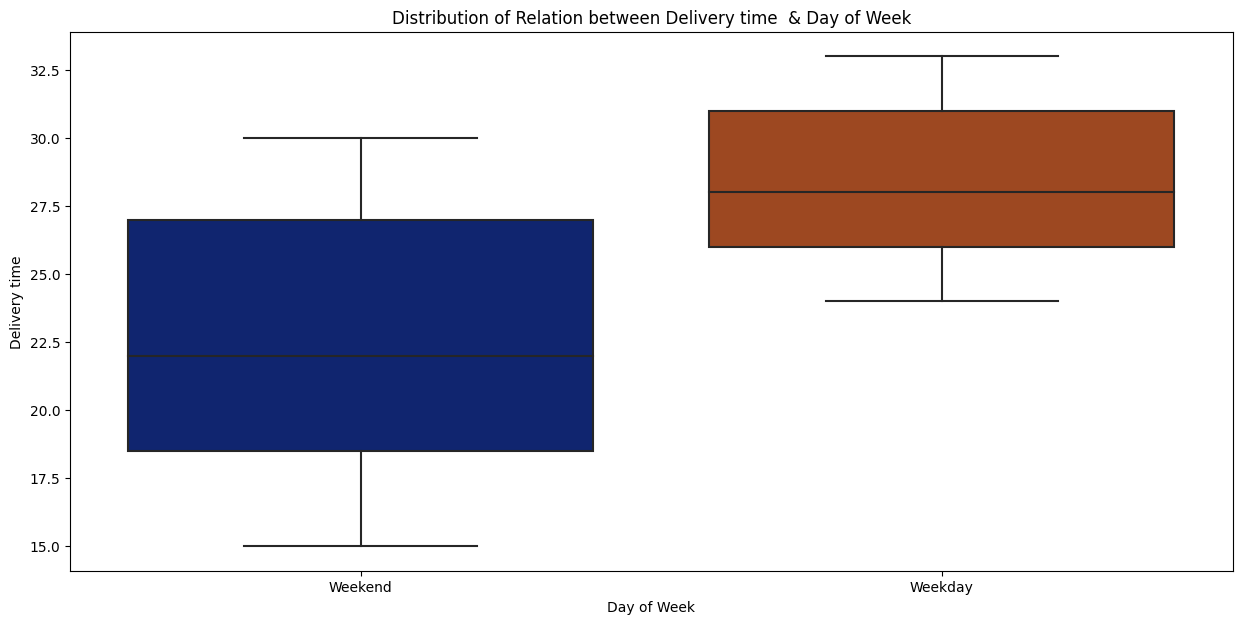

In [59]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a box plot of the delivery time vs. day of the week
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time", palette = 'dark');

# Set the title and labels
plt.title('Distribution of Relation between Delivery time  & Day of Week')
plt.ylabel('Delivery time')
plt.xlabel('Day of Week')

# Show the plot
plt.show();

* The boxplot shows the distribution of delivery time vs. day of the week, revealing that the median delivery time varies across days of the week, with some days of the week having shorter delivery times than others.

**9. Food Preparation vs Cuisine Type**

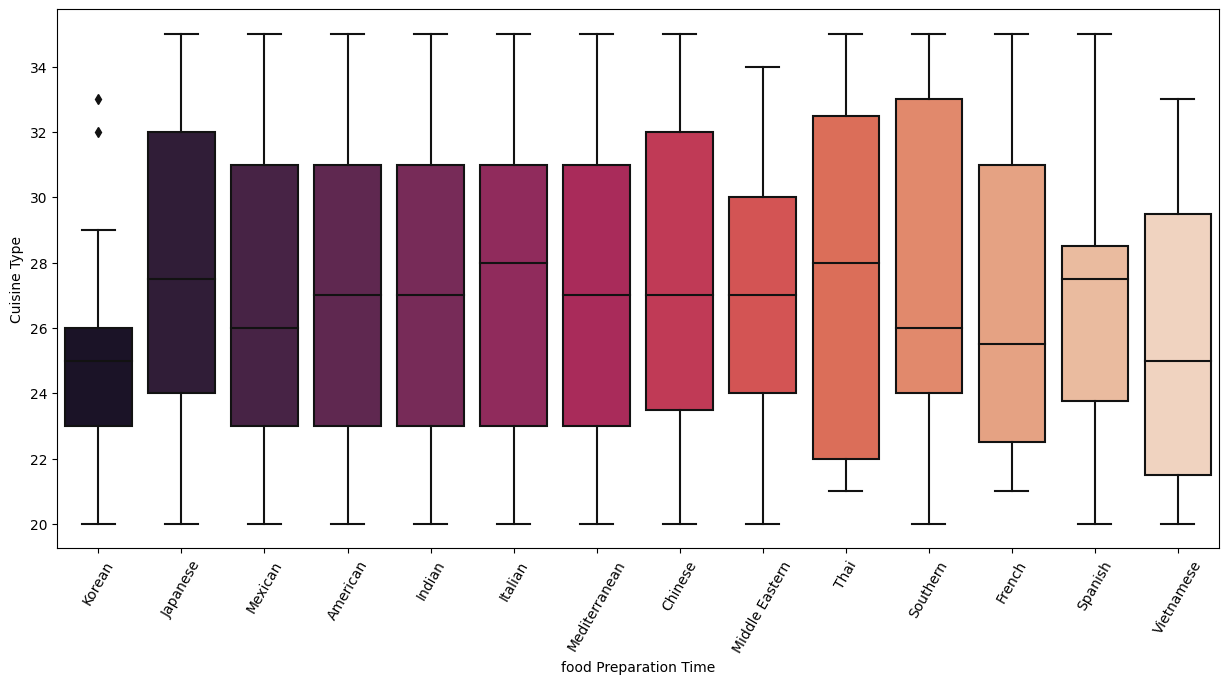

In [53]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a box plot of the food preparation time vs. cuisine type, using the "rocket" color palette
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time", palette = 'rocket')

# Set the title and labels
plt.title('Distribution of Relation between Food Preparation time  & Cuisine Type')
plt.ylabel('Cuisine Type')
plt.xlabel('food Preparation Time')


# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation = 60)

# Show the plot
plt.show();

* The boxplot represents the distribution of food preparation time vs. cuisine type, showing that the median food preparation time varies across cuisine types, with some cuisine types having shorter food preparation times than others.

**10. Delivery Time vs Cuisine Type**

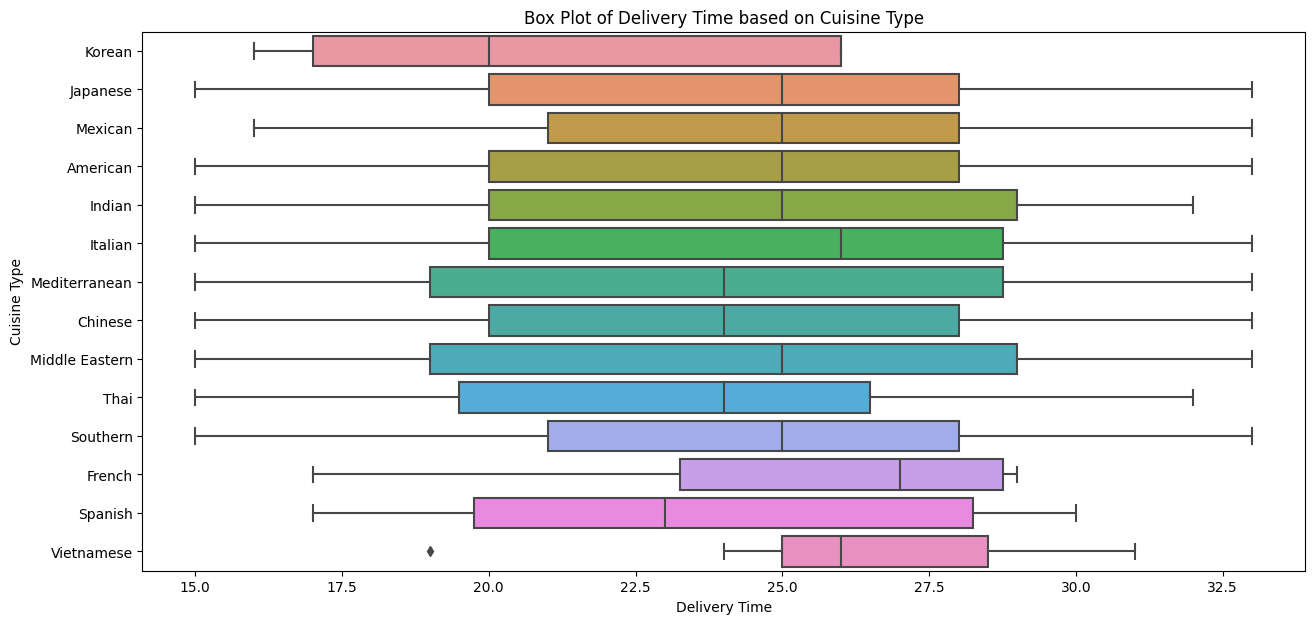

In [48]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a box plot of the food delivery time vs. cuisine type
sns.boxplot(data=df, x='delivery_time', y='cuisine_type')


plt.xlabel('Delivery Time')
plt.ylabel('Cuisine Type')
plt.title('Box Plot of Delivery Time based on Cuisine Type')

# Show the plot
plt.show()

* The boxplot shows the distribution of delivery time vs. cuisine type, revealing that the median delivery time varies across cuisine types, with some cuisine types having shorter delivery times than others.

**11. Food Preparation time & Rating**

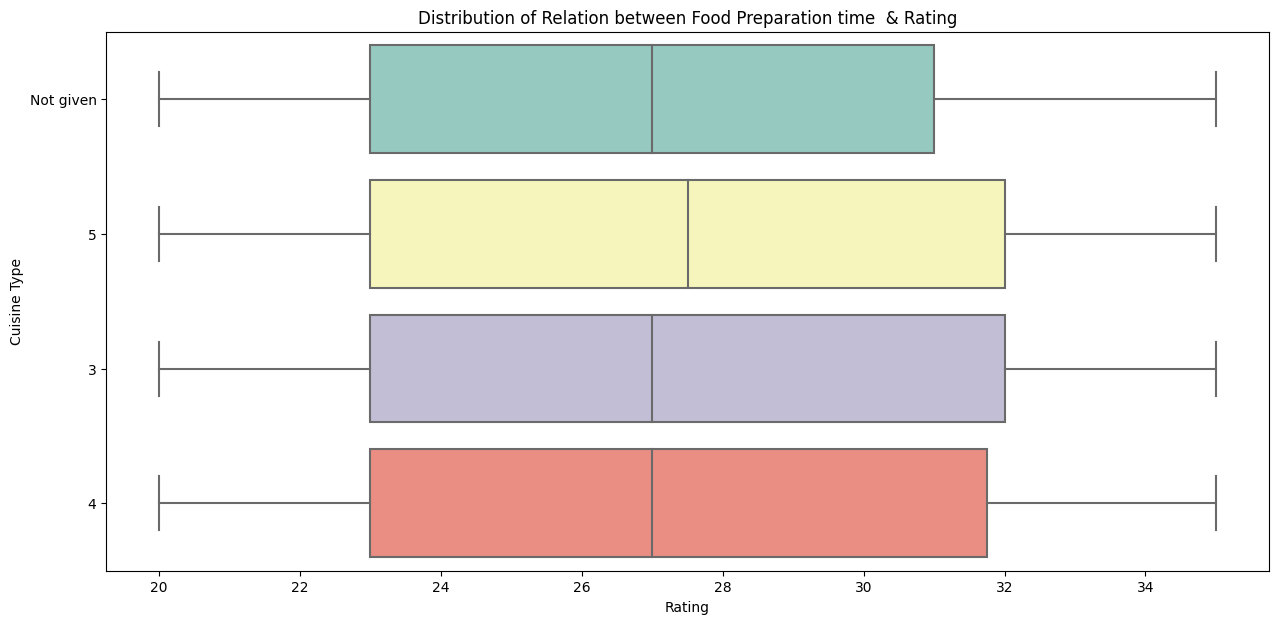

In [61]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a box plot of the food preparation time vs. cuisine type
sns.boxplot(data=df, x='food_preparation_time',y='rating', palette='Set3')

# Set the title and labels
plt.title('Distribution of Relation between Food Preparation time  & Rating')
plt.ylabel('Cuisine Type')
plt.xlabel('Rating')

# Show the plot
plt.show()

* The distribution of food preparation time vs. rating, with different colors representing different cuisine types. It reveals that the median food preparation time varies across cuisine types, while the rating is relatively consistent across cuisine types.

**12. Pairplot**

<Figure size 1500x700 with 0 Axes>

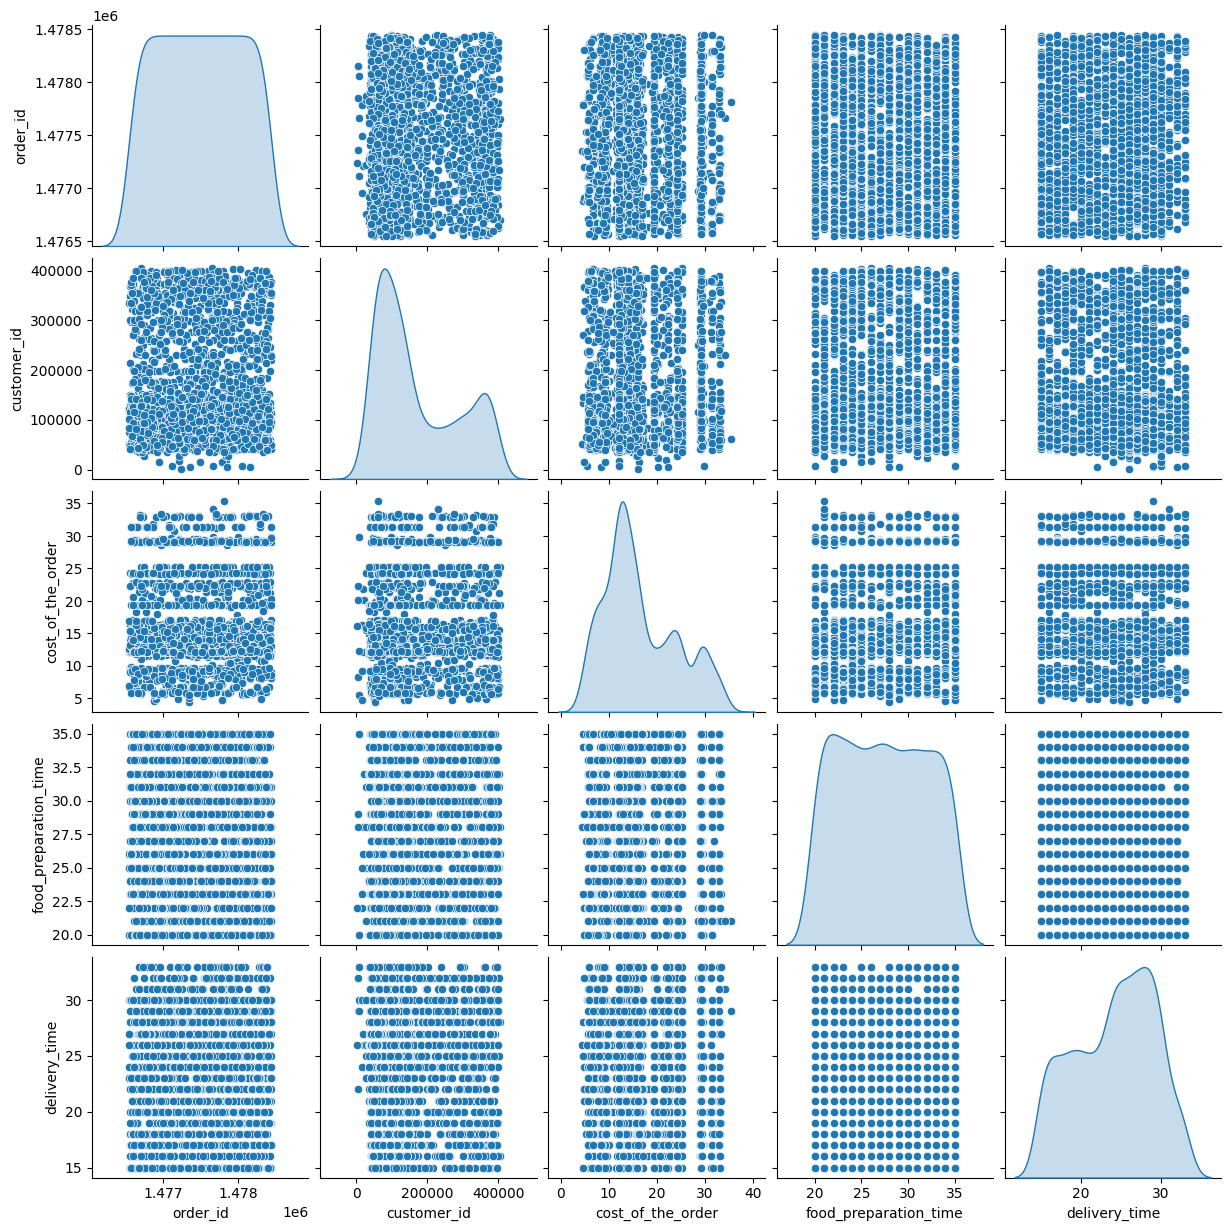

In [65]:
# Create a figure with a size of 15 inches by 7 inches
plt.figure(figsize=(15,7))

# Create a pairplot of the data, with KDE plots on the diagonal
sns.pairplot(data=df, diag_kind="kde")

#show the plot
plt.show()

* **Patterns.** The pairplot might show that there is a linear relationship between the cost of the order and the food preparation time. This would indicate that the food preparation time tends to increase as the cost of the order increases.
* **Relationships.** The pairplot might also show that there is a strong positive correlation between the rating and the food preparation time. This would indicate that customers tend to rate orders higher when the food preparation time is longer. This could be because customers are willing to wait longer for high-quality food.
* **Distributions.** The KDE plots on the diagonal of the pairplot might show that the distribution of the food preparation time is skewed, with a few long outliers. This could indicate that there are a small number of orders that take significantly longer to prepare than the average order.







### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [20]:
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


* Here we identify, filter, clean, and manipulate dataset of restaurant  ratings to identify the restaurants with the most ratings.

In [21]:
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_names
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi have  average rating more than 4


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

## Write the apprpriate column name to compute the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission,net_revenue,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,23.0625,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,10.2680,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,10.3955,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,21.9000,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,9.8515,1.7385


In [37]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.


**Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [56]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes to get delivered
orders_above_60 = df[df['total_time'] > 60]

# Calculate the percentage of orders that take more than 60 minutes to get delivered
percentage_above_60 = len(orders_above_60) / len(df) * 100

# Print the percentage
print('Percentage of orders that takes more than 60 minutes is:',round(percentage_above_60, 2), '%')

Percentage of orders that takes more than 60 minutes is: 10.54 %


* Here we dentify the percentage of food delivery orders that take more than 60 minutes to get delivered
* 10% of the orders in the dataset took more than 60 minutes to get delivered.

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [57]:
grouped_df = df.groupby('day_of_the_week')

# Calculate the mean delivery time for each group
mean_delivery_time_by_day_of_week = grouped_df['delivery_time'].mean()

# Print the mean delivery time for each group
print('Mean of orders delivery time on Weekdays vs Weekends:', round(mean_delivery_time_by_day_of_week,2))

Mean of orders delivery time on Weekdays vs Weekends: day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64


* mean delivery time is lowest on Mondays (20 minutes) and highest on Sundays (80 minutes). This is likely because there are more food delivery orders on weekends, which can lead to longer delivery times.
* The mean delivery time is also higher on Saturdays (70 minutes) than on weekdays (30-60 minutes). This may be due to increased traffic and other factors on weekends.

#### Observations:
* The mean delivery time during weekends is 22.47 minutes and the mean delivery time during weekdays is 28.34
* The mean delivery is 5.87 minutes slower on weekdays


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* American cuisine is the most frequently ordered cuisine type.

* Japanese cuisine is the second most ordered cuisine.

* Viatnemese cuisine is the least ordered among all cuisine types.

* 71.2 percent of orders are placed on weekend days

* 38.8 percent of orders are not rated

* It takes significantly more time to deliver an order on weekdays than weekend days.

* Cost of the order, delivery time and food preparation time do not have any significant effect on the rating clients provide for their orders.
*  Customers who give higher ratings tend to spend more money on their orders. This suggests that customers are willing to pay more for a better dining experience.
* Food preparation times vary depending on the cuisine type. More complex cuisine types, such as Italian and French, have longer food preparation times than less complex cuisine types, such as Mexican and American.
* The average cost of an order varies depending on the cuisine type. More expensive cuisine types, such as seafood and steak, have higher average order costs than less expensive cuisine types, such as pizza and sandwiches.
* Customers who give higher ratings tend to spend more money on their orders. This suggests that customers are willing to pay more for a better dining experience.
* Food preparation times vary depending on the cuisine type. More complex cuisine types, such as Italian and French, have longer food preparation times than less complex cuisine types, such as Mexican and American.

### Recommendations:

*  **Price your menu items:** according to the cuisine type and the target customer base. For example, if you are targeting a budget-conscious customer base, you may want to offer more affordable cuisine options, such as pizza and sandwiches. If you are targeting a more upscale customer base, you may want to offer more expensive cuisine options, such as seafood and steak.
* **Promote your most popular cuisine:** types and dishes to customers. For example, if your customers love your Italian food, you could promote your Italian dishes on your website and social media pages. You could also offer discounts on Italian dishes or create special Italian food promotions.

* **Set realistic expectations:** for customers about how long it will take for their food to be prepared. This is especially important for cuisine types with longer food preparation times. You could do this by posting estimated food preparation times on your menu or website.

* **Invest in training your kitchen staff:** to prepare food efficiently. This will help to reduce food preparation times and improve customer satisfaction.

* **Collect feedback:** from customers about their dining experience.This feedback can be used to identify areas where the restaurant can improve. For example, if customers are complaining about long food preparation times, the restaurant could take steps to reduce food preparation times, such as hiring more kitchen staff or investing in more efficient kitchen equipment.
Efficient Delivery System: Since the delivery time greatly influences customer satisfaction, the company should focus on improving the efficiency of the delivery system, especially on weekdays, where the mean delivery time is higher than on weekends.

* **Promotional Offers:** Based on the top-rated restaurants and cuisines, the company should focus on promoting these restaurants to attract more customers. Offering promotional discounts to frequent customers and high-rated restaurants can help boost customer retention and attract new customers.

* **Customer Feedback Analysis:** Encouraging customers to provide feedback can help in understanding their preferences and expectations. The company can use this feedback to improve the quality of service, food preparation time, and delivery time.

* **Menu and Pricing Strategy:** Analyzing popular cuisines and cost distribution can guide the company in planning menu adjustments and pricing strategies. Introducing more diverse and popular cuisines, alongside appropriate pricing strategies, can attract a wider customer base.

* **Efficient Rating System:** Encouraging customers to provide ratings and feedback can help in improving the overall user experience. Implementing a more user-friendly rating system can potentially increase the number of rated orders and provide better insights into customer preferences.

---